# Test 51: The median test of K populations

## Objective

- You have $K$ random samples from $K$ populations
- Do all $K$ samples come from populations with the same frequency distribution?

## Assumptions

- The $K$ samples are all reasonably large

## Method

- Same idea as `Test 50`; combine all $K$ samples into a single massive sample, and find the median $M$

- Then, create the table below

| | Sample 1 | ... | Sample K | Total |
| - | - | - | - | - |
| Above Median | $a_{11}$ | ... | $a_{1K}$ | $r_1$ |
| Below Median | $a_{21}$ | ... | $a_{2K}$ | $r_2$ |
| Total | $a_{1}$ | ... | $a_{K}$ | N |

-  From this table, compute the expected frequencies in each cell. The asssumption here is that rows and columns are independent, so the expected counts is just the product of marginal probabilities
$$\begin{aligned}
    e_{ij} &= \frac{r_i}{N} \cdot \frac{a_j}{N} \cdot N \\
    &= \frac{r_i \cdot a_j}{N}
\end{aligned}$$

- The test statistic is
$$\begin{aligned}
    \chi^2 &= \sum_{i=1}^{2} \sum_{j=1}^{K} \frac{(a_{ij} - e_{ij})^2}{e_{ij}} 
\end{aligned}$$

- This follows a chi-square distribution with $K-1$ degrees of freedom. If the test statistic exceeds the critical value, reject the null that the $K$ populations have the same frequency distribution

## Proof

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
K = 4
verbose=False

def get_test_statistic(verbose=False):
    sample1 = np.random.normal(50,5000,30)
    sample2 = np.random.normal(50,5000,30)
    sample3 = np.random.normal(50,5000,30)
    sample4 = np.random.normal(50,5000,30)
    overall_median = np.median(np.concatenate((sample1,sample2,sample3,sample4)))
    if verbose:
        print(f"{overall_median=}")

    above_median = np.array([np.sum(s >= overall_median) for s in [sample1,sample2,sample3,sample4]])
    below_median = np.array([np.sum(s < overall_median) for s in [sample1,sample2,sample3,sample4]])
    if verbose:
        print(f'{above_median=}')
        print(f'{below_median=}')

    table = np.concatenate((above_median, below_median)).reshape(2,-1)
    col_sums = np.sum(table, axis=0)
    row_sums = np.sum(table, axis=1)
    overall_count = np.sum(col_sums)
    if verbose:
        print(f"{col_sums=}")
        print(f"{row_sums=}")

    expected_freqs = np.concatenate((
        np.array((row_sums[0]/overall_count) * above_median * 2),
        np.array((row_sums[1]/overall_count) * below_median * 2),
    )).reshape(2, -1)
    if verbose:
        print(f"{expected_freqs=}")
        print(np.sum(expected_freqs))

    test_statistic = np.sum((table - expected_freqs)**2 / expected_freqs)
    return test_statistic

get_test_statistic(verbose=True)

overall_median=-104.2078088841944
above_median=array([13, 18, 13, 16])
below_median=array([17, 12, 17, 14])
col_sums=array([30, 30, 30, 30])
row_sums=array([60, 60])
expected_freqs=array([[13., 18., 13., 16.],
       [17., 12., 17., 14.]])
120.0


0.0

/var/folders/hs/wbbxdff91wj8m8np2cv6jnnw0000gq/T/ipykernel_27863/4032765553.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(test_statistic_distribution, label='test statistic')


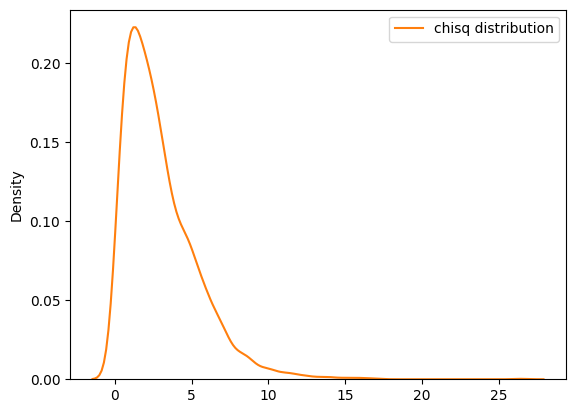

In [214]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(K-1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()